In [2]:
import numpy as np         # package for numerical computations
import pandas as pd        # package for data analysis and management

# libraries for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# for preprocessing, ML models and evaluation
from sklearn.preprocessing import StandardScaler           # for standardizing the data

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error #evaluation metrics for regression model


# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
cancer_test_data  = pd.read_csv('cancer_us_county-testing.csv')
cancer_train_data = pd.read_csv('cancer_us_county-training.csv')

In [5]:
pd.set_option('display.max_columns',45) 
#to display the top 5 rows
cancer_train_data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,39.2,40.5,"Jackson County, Kentucky",2.39,59.2,23.0,32.5,NaN,3.5,43.4,4.3,37.3,12.3,44.8,33.6,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,30.8,35.2,"Willacy County, Texas",3.51,44.3,24.7,49.0,NaN,0.5,35.5,6.4,31.7,11.5,27.2,20.7,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,40.9,43.8,"Henry County, Indiana",2.54,48.2,24.0,38.3,NaN,6.4,43.5,10.2,48.5,10.6,67.4,49.6,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,38.3,46.3,"Morton County, Kansas",2.53,54.2,21.1,51.0,21.7,6.2,32.5,10.6,57.1,5.8,70.9,56.8,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,41.2,47.8,"Hancock County, Georgia",2.49,30.2,46.6,35.4,NaN,4.0,40.6,5.9,28.6,14.6,54.8,37.8,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4


In [4]:
pd.set_option('display.max_columns',45) 
#to display the top 5 rows
cancer_test_data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.0,154,159.5,479.8,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,28.5,31.8,"Tompkins County, New York",2.35,37.3,3.1,13.0,NaN,14.6,19.8,22.2,54.9,5.9,79.9,67.1,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.0,140,167.2,438.5,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,44.9,48.2,"Hood County, Texas",2.51,58.3,20.4,36.9,NaN,3.0,28.4,17.1,51.0,5.0,64.9,45.3,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
2,54.0,18,131.6,410.8,49380,10103,11.7,0.000000,"(48021.6, 51046.4]",49.4,49.4,49.4,"Valley County, Idaho",2.99,50.9,19.5,44.4,36.2,0.0,28.6,21.1,53.1,5.7,59.7,40.3,32.6,40.3,19.4,98.292181,0.041152,0.164609,0.051440,55.928482,1.604585,2192
3,94.0,46,189.4,403.8,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,42.1,45.0,"Giles County, Virginia",2.32,50.7,14.6,31.3,NaN,4.8,40.0,9.5,NaN,4.8,68.7,49.5,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.0,1065,168.9,432.1,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,32.4,34.6,"San Joaquin County, California",3.16,47.9,18.7,30.8,NaN,5.0,26.4,12.5,52.7,13.7,57.2,47.1,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394


Performing Exploratory Data Analysis (EDA)

In [5]:
cancer_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

In [6]:
cancer_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              609 non-null    float64
 1   avgDeathsPerYear         609 non-null    int64  
 2   TARGET_deathRate         609 non-null    float64
 3   incidenceRate            609 non-null    float64
 4   medIncome                609 non-null    int64  
 5   popEst2015               609 non-null    int64  
 6   povertyPercent           609 non-null    float64
 7   studyPerCap              609 non-null    float64
 8   binnedInc                609 non-null    object 
 9   MedianAge                609 non-null    float64
 10  MedianAgeMale            609 non-null    float64
 11  MedianAgeFemale          609 non-null    float64
 12  Geography                609 non-null    object 
 13  AvgHouseholdSize         609 non-null    float64
 14  PercentMarried           6

There are 34 columns including the target variable.
There are null values in the three columns (PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone).
There are two columns of type Object (Geography,binnedInc) and rest columns of type int64 or float64.

In [7]:
# descriptive statistics
cancer_train_data.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,612.000000,2438.000000,2438.000000,2438.000000,2316.000000,2438.000000,2438.000000,1938.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,45.313782,39.640853,42.214356,2.477259,51.770632,18.136505,35.115463,41.010621,6.111731,34.902994,13.234783,54.121805,7.867637,64.371452,48.453148,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,45.053173,5.217646,5.285603,0.432722,6.822147,7.997320,9.064684,11.054857,4.514472,7.018478,5.323185,8.313764,3.450552,10.566997,10.002029,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,19.500000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,37.800000,36.400000,39.100000,2.370000,47.700000,12.700000,29.400000,33.900000,3.100000,30.500000,9.400000,48.600000,5.500000,57.400000,41.000000,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.490000,52.400000,17.100000,34.900000,40.400000,5.350000,35.300000,12.300000,54.400000,7.600000,65.000000,48.600000,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,44.075000,42.500000,45.400000,2.630000,56.300000,22.500000,40.700000,46.700000,8.100000,39.700000,16.100000,60.400000,9.700000,72.000000,55.700000,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000
max,24965.000000,9445.000000,293.900000,1014.200000,125635.000000,5.238216e+06,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,59.100000,72.500000,79.000000,51.800000,54.800000,39.700000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,42.619425,41.930251,78.075397,18.556701,3046.000000


In [8]:
# descriptive statistics
cancer_test_data.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,609.000000,609.000000,609.000000,609.000000,609.000000,6.090000e+02,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,150.000000,609.000000,609.000000,609.000000,579.000000,609.000000,609.000000,500.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,683.067944,207.476190,177.925780,448.109810,47202.812808,1.191372e+05,16.973563,112.885432,45.106404,39.289984,41.868966,2.489282,51.785878,18.576519,34.548112,40.840000,6.344663,34.411002,13.471100,54.275993,7.791461,64.288834,48.456200,41.011658,36.160263,19.261084,83.121969,9.365754,1.346103,2.125887,51.352773,5.691785,1519.840722
std,1978.627131,708.568892,28.599788,59.573942,12520.769346,4.899460e+05,6.495675,358.996110,46.334158,5.254323,5.317137,0.414875,7.194289,8.463167,9.083136,11.397716,4.586003,7.092529,5.672848,8.326314,3.461811,10.970337,10.401163,9.771919,7.920750,6.193365,16.793593,15.215528,2.809767,3.419138,6.856244,2.063121,899.544555
min,9.000000,3.000000,59.700000,269.900000,24035.000000,1.358000e+03,4.700000,0.000000,23.200000,23.700000,22.300000,0.023900,26.200000,0.800000,7.100000,17.700000,0.000000,11.500000,4.700000,17.600000,0.700000,31.500000,24.100000,16.300000,14.800000,6.200000,13.933562,0.000000,0.000000,0.000000,23.885628,0.284091,10.000000
25%,75.000000,28.000000,160.200000,420.500000,39025.000000,1.218100e+04,12.400000,0.000000,37.400000,36.100000,38.600000,2.360000,47.800000,13.100000,28.700000,34.100000,3.100000,29.600000,9.400000,48.350000,5.400000,56.600000,40.600000,33.600000,30.600000,14.300000,77.048638,0.607010,0.278340,0.318345,47.399630,4.585307,704.000000
50%,169.000000,61.000000,178.200000,453.549422,45292.000000,2.558600e+04,15.500000,0.000000,40.800000,39.300000,42.100000,2.500000,52.500000,17.300000,34.200000,40.500000,5.400000,35.200000,12.500000,54.900000,7.500000,65.300000,49.300000,40.700000,36.300000,18.900000,89.606996,2.004479,0.547264,0.943696,51.708723,5.475268,1597.000000
75%,513.000000,138.000000,194.100000,476.700000,52476.000000,6.783700e+04,20.400000,58.267135,43.900000,42.700000,45.200000,2.650000,57.000000,23.300000,40.100000,46.175000,8.500000,39.400000,16.100000,60.100000,9.600000,72.800000,55.325000,47.800000,41.800000,23.100000,95.363876,11.063967,1.245240,2.356943,55.590179,6.593969,2298.000000
max,38150.000000,14010.000000,362.800000,1206.900000,106871.000000,1.017029e+07,41.900000,4260.367794,579.600000,58.600000,59.600000,3.670000,72.300000,64.100000,66.200000,73.500000,43.400000,53.600000,42.200000,73.600000,20.800000,87.500000,76.600000,70.200000,57.500000,38.800000,99.498433,85.947799,33.760905,25.504910,71.703057,21.326165,3044.000000


In [9]:
#checking whether the data contains any duplicate records
dup_train_data = cancer_train_data[cancer_train_data.duplicated()] 
#checking whether the data contains any duplicate records
dup_test_data = cancer_test_data[cancer_test_data.duplicated()] 

In [10]:
dup_train_data.shape

(0, 35)

In [11]:
dup_test_data.shape

(0, 35)

In [12]:
#dropping the duplicates from train dataset
cancer_train_data.drop_duplicates(inplace=True)

#dropping the duplicates from test dataset
cancer_test_data.drop_duplicates(inplace=True)

In [13]:
cancer_train_data.shape


(2438, 35)

In [14]:
cancer_test_data.shape

(609, 35)

In [7]:
cancer_train_data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1826
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          122
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     500
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [8]:
#dropping this column as it has more null values
cancer_train_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)
cancer_test_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)

In [12]:
cancer_train_data.fillna(cancer_train_data.mean(), inplace=True)
cancer_test_data.fillna(cancer_test_data.mean(), inplace=True)

cancer_test_data.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

In [16]:
#checking the value counts of two categorical columns in train dataset 
for i in cancer_train_data.select_dtypes(include=object):
    print(cancer_train_data[i].value_counts(ascending=False))
    print("-------------------------------------------------------------------------------")

(40362.7, 42724.4]    254
(54545.6, 61494.5]    252
(34218.1, 37413.8]    252
(45201, 48021.6]      249
(37413.8, 40362.7]    242
(61494.5, 125635]     240
(48021.6, 51046.4]    240
(42724.4, 45201]      238
(51046.4, 54545.6]    236
[22640, 34218.1]      235
Name: binnedInc, dtype: int64
-------------------------------------------------------------------------------
Jackson County, Kentucky         1
Cascade County, Montana          1
Morris County, Texas             1
Dallas County, Arkansas          1
Berrien County, Michigan         1
                                ..
Magoffin County, Kentucky        1
Emmons County, North Dakota      1
Monroe County, New York          1
Hall County, Nebraska            1
Yadkin County, North Carolina    1
Name: Geography, Length: 2438, dtype: int64
-------------------------------------------------------------------------------


In [17]:
#checking the value counts of two categorical columns in test dataset
for i in cancer_test_data.select_dtypes(include=object):
    print(cancer_test_data[i].value_counts(ascending=False))
    print("-------------------------------------------------------------------------------")

[22640, 34218.1]      71
(51046.4, 54545.6]    69
(42724.4, 45201]      67
(48021.6, 51046.4]    65
(61494.5, 125635]     62
(37413.8, 40362.7]    62
(45201, 48021.6]      57
(54545.6, 61494.5]    54
(34218.1, 37413.8]    52
(40362.7, 42724.4]    50
Name: binnedInc, dtype: int64
-------------------------------------------------------------------------------
Tompkins County, New York        1
Knox County, Nebraska            1
Antelope County, Nebraska        1
Ouachita County, Arkansas        1
Sanilac County, Michigan         1
                                ..
Wichita County, Kansas           1
Asotin County, Washington        1
Coffee County, Alabama           1
Riverside County, California     1
Jefferson County, Mississippi    1
Name: Geography, Length: 609, dtype: int64
-------------------------------------------------------------------------------


In [18]:
#dropping Geography column as it as more only one count in each unique value
#dropping the binnedInc column as we already have Medianincome of a country column
cancer_train_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)
cancer_test_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)

IndexError: list index out of range

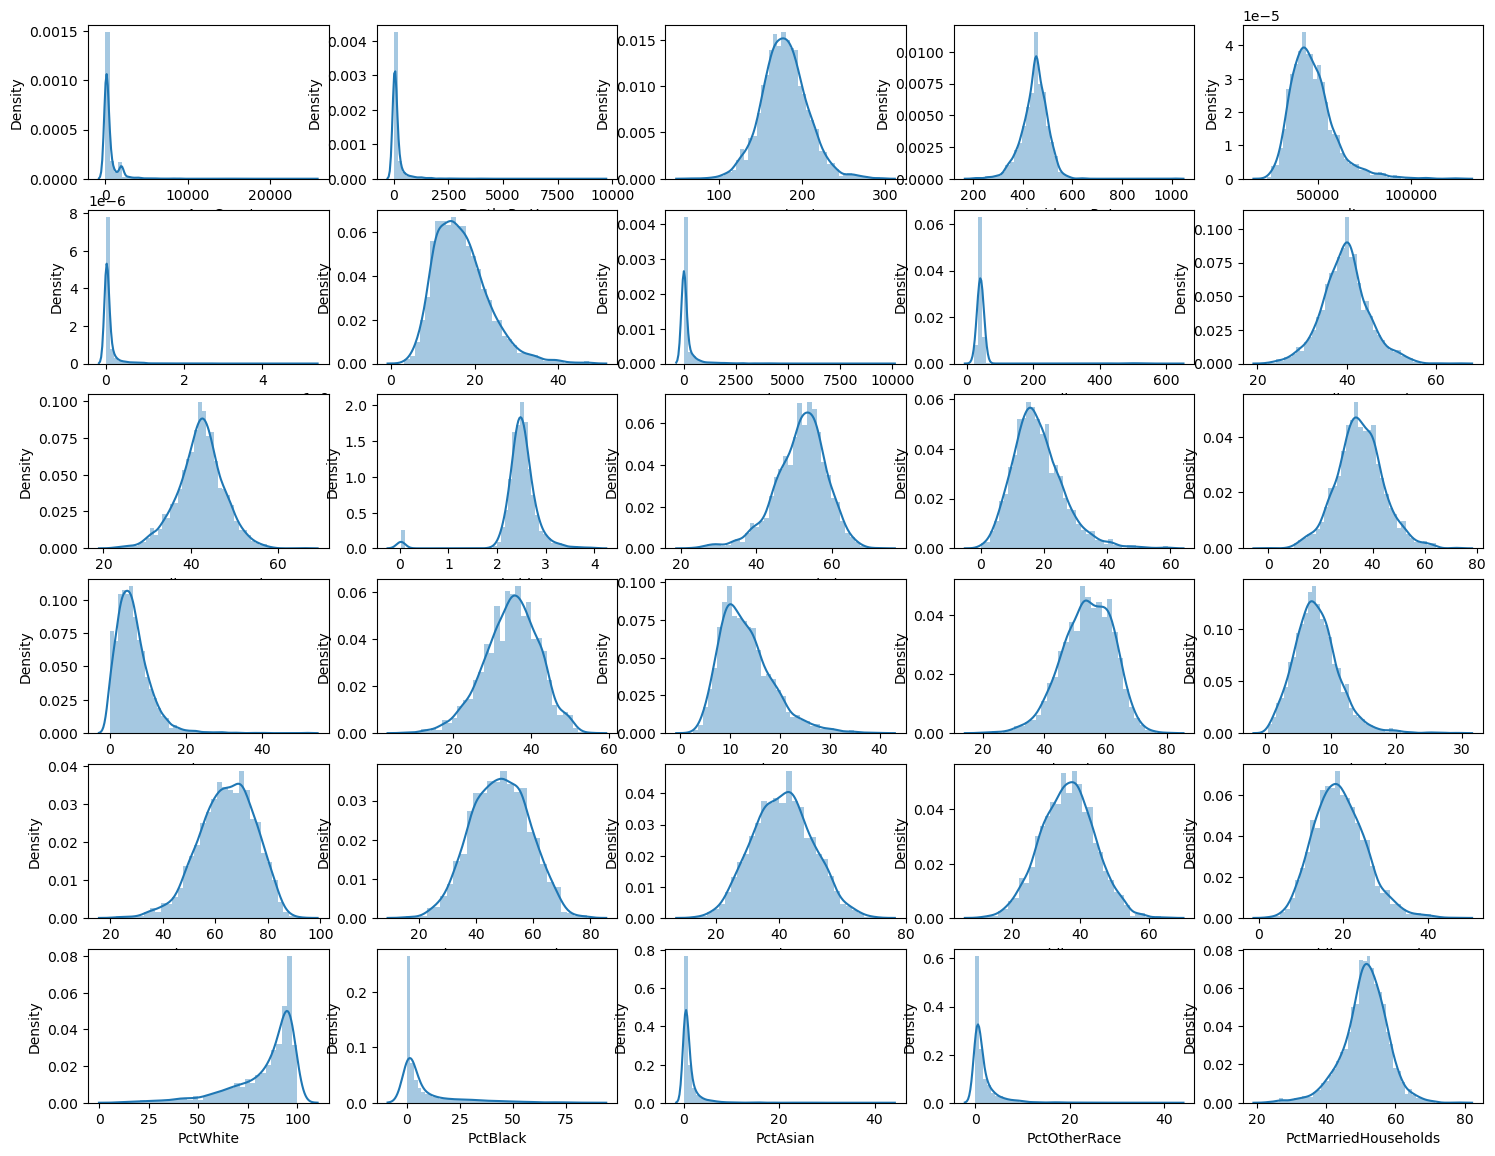

In [19]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_train_data.columns[:-1]):
 plot = sns.distplot(cancer_train_data[c] ,ax=axes[i])
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_test_data.columns[:-1]):
 plot = sns.distplot(cancer_test_data[c] ,ax=axes[i])
plt.tight_layout()

Most of the features follow the normal distribution
PctWhite feature is left skewed
PctBlack, PctAsian, PctOtherRace, AvgAnnount, avgDeathsPerYear, popEst2015, studyPerCap, MedianAge features are right skewed

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_train_data.columns[:-1]):
   plot = sns.scatterplot(x="TARGET_deathRate",y=c,data=cancer_train_data,ax=axes[i])
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_test_data.columns[:-1]):
   plot = sns.scatterplot(x="TARGET_deathRate",y=c,data=cancer_test_data,ax=axes[i])
plt.tight_layout()

We can clearly see some of the inferences from these scatterplot
incident rate, povertyPercent, PctHS25_over, PctHS18_24, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone are positively correlated with the target variable
medianIncome, PercentMarried, PctEmpPrivCoverage,PctPrivateCoverage, PctPrivateCoverageAlone, PctBatchDeg25_Over, PctEmplyed16_Over, pctMarriedHousehold are negatively correlated with the target variable
Seems like avgAnnCount, avgDeathPerYear, IncidentRate, MedianAge,studyPerCap are having outliers with respect to the target variable

# Correlation using heatmap

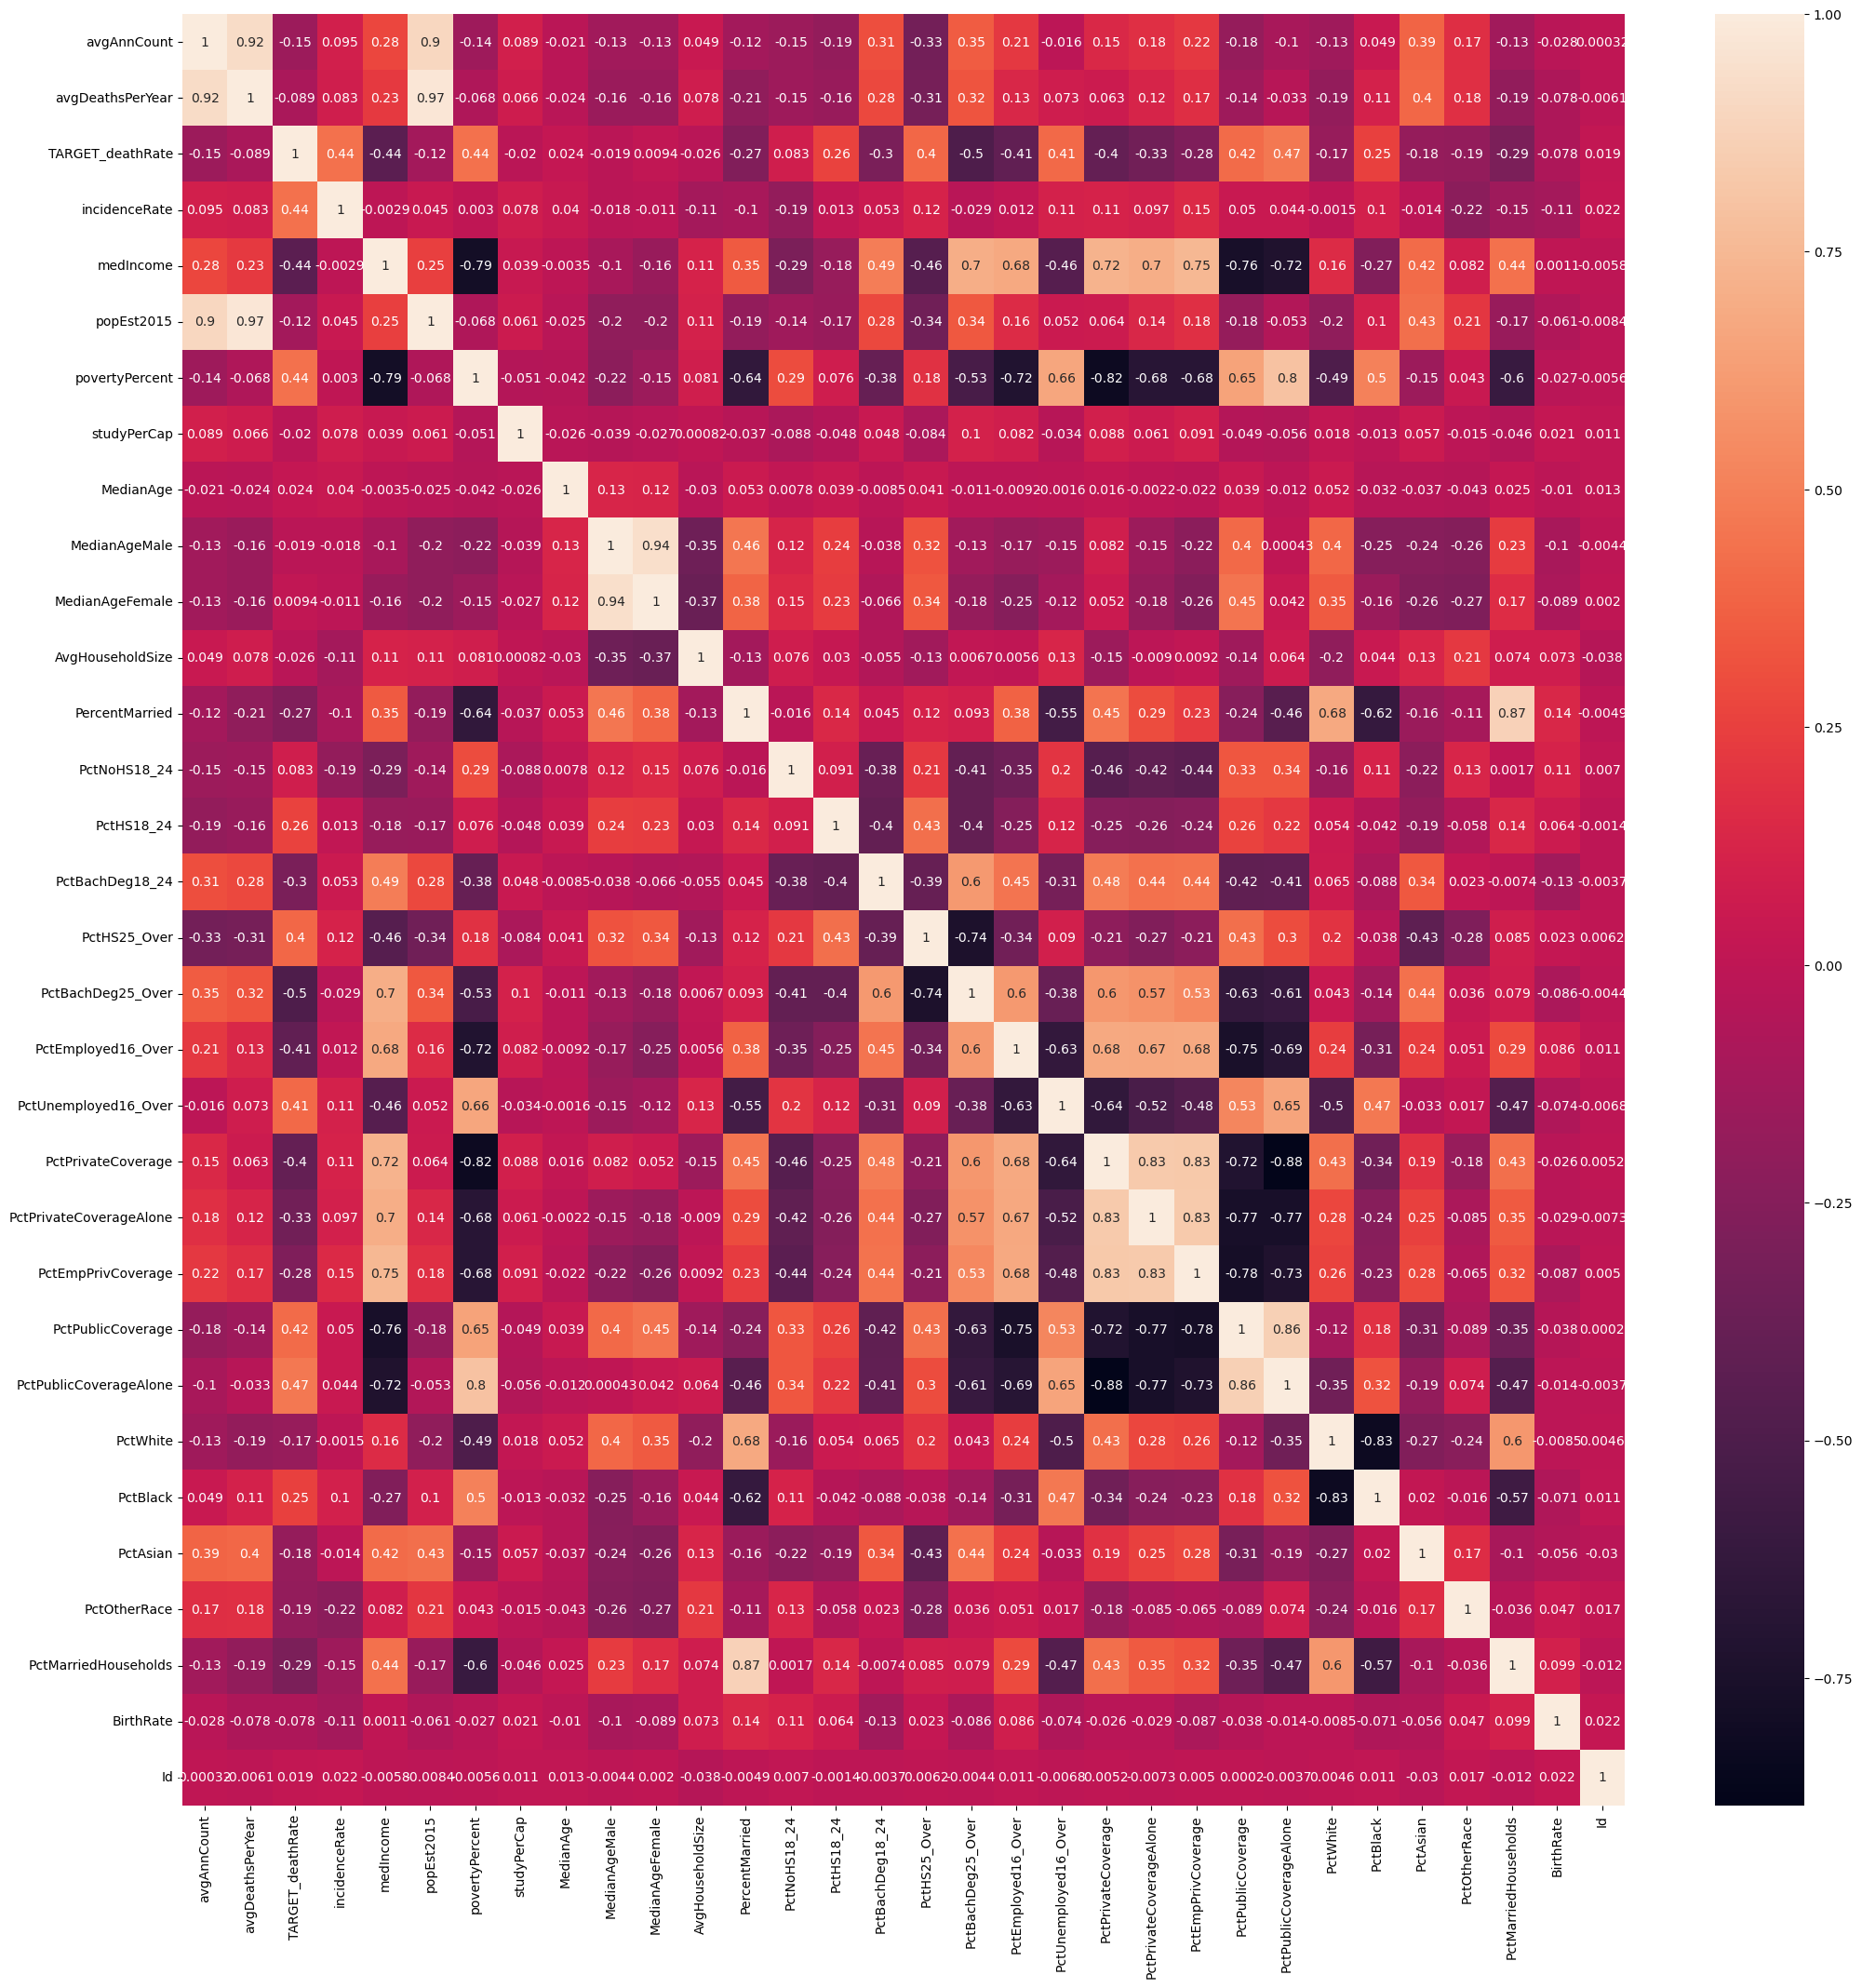

In [13]:
f,ax=plt.subplots(figsize=(25,25));
sns.heatmap(cancer_train_data.corr(),annot=True);

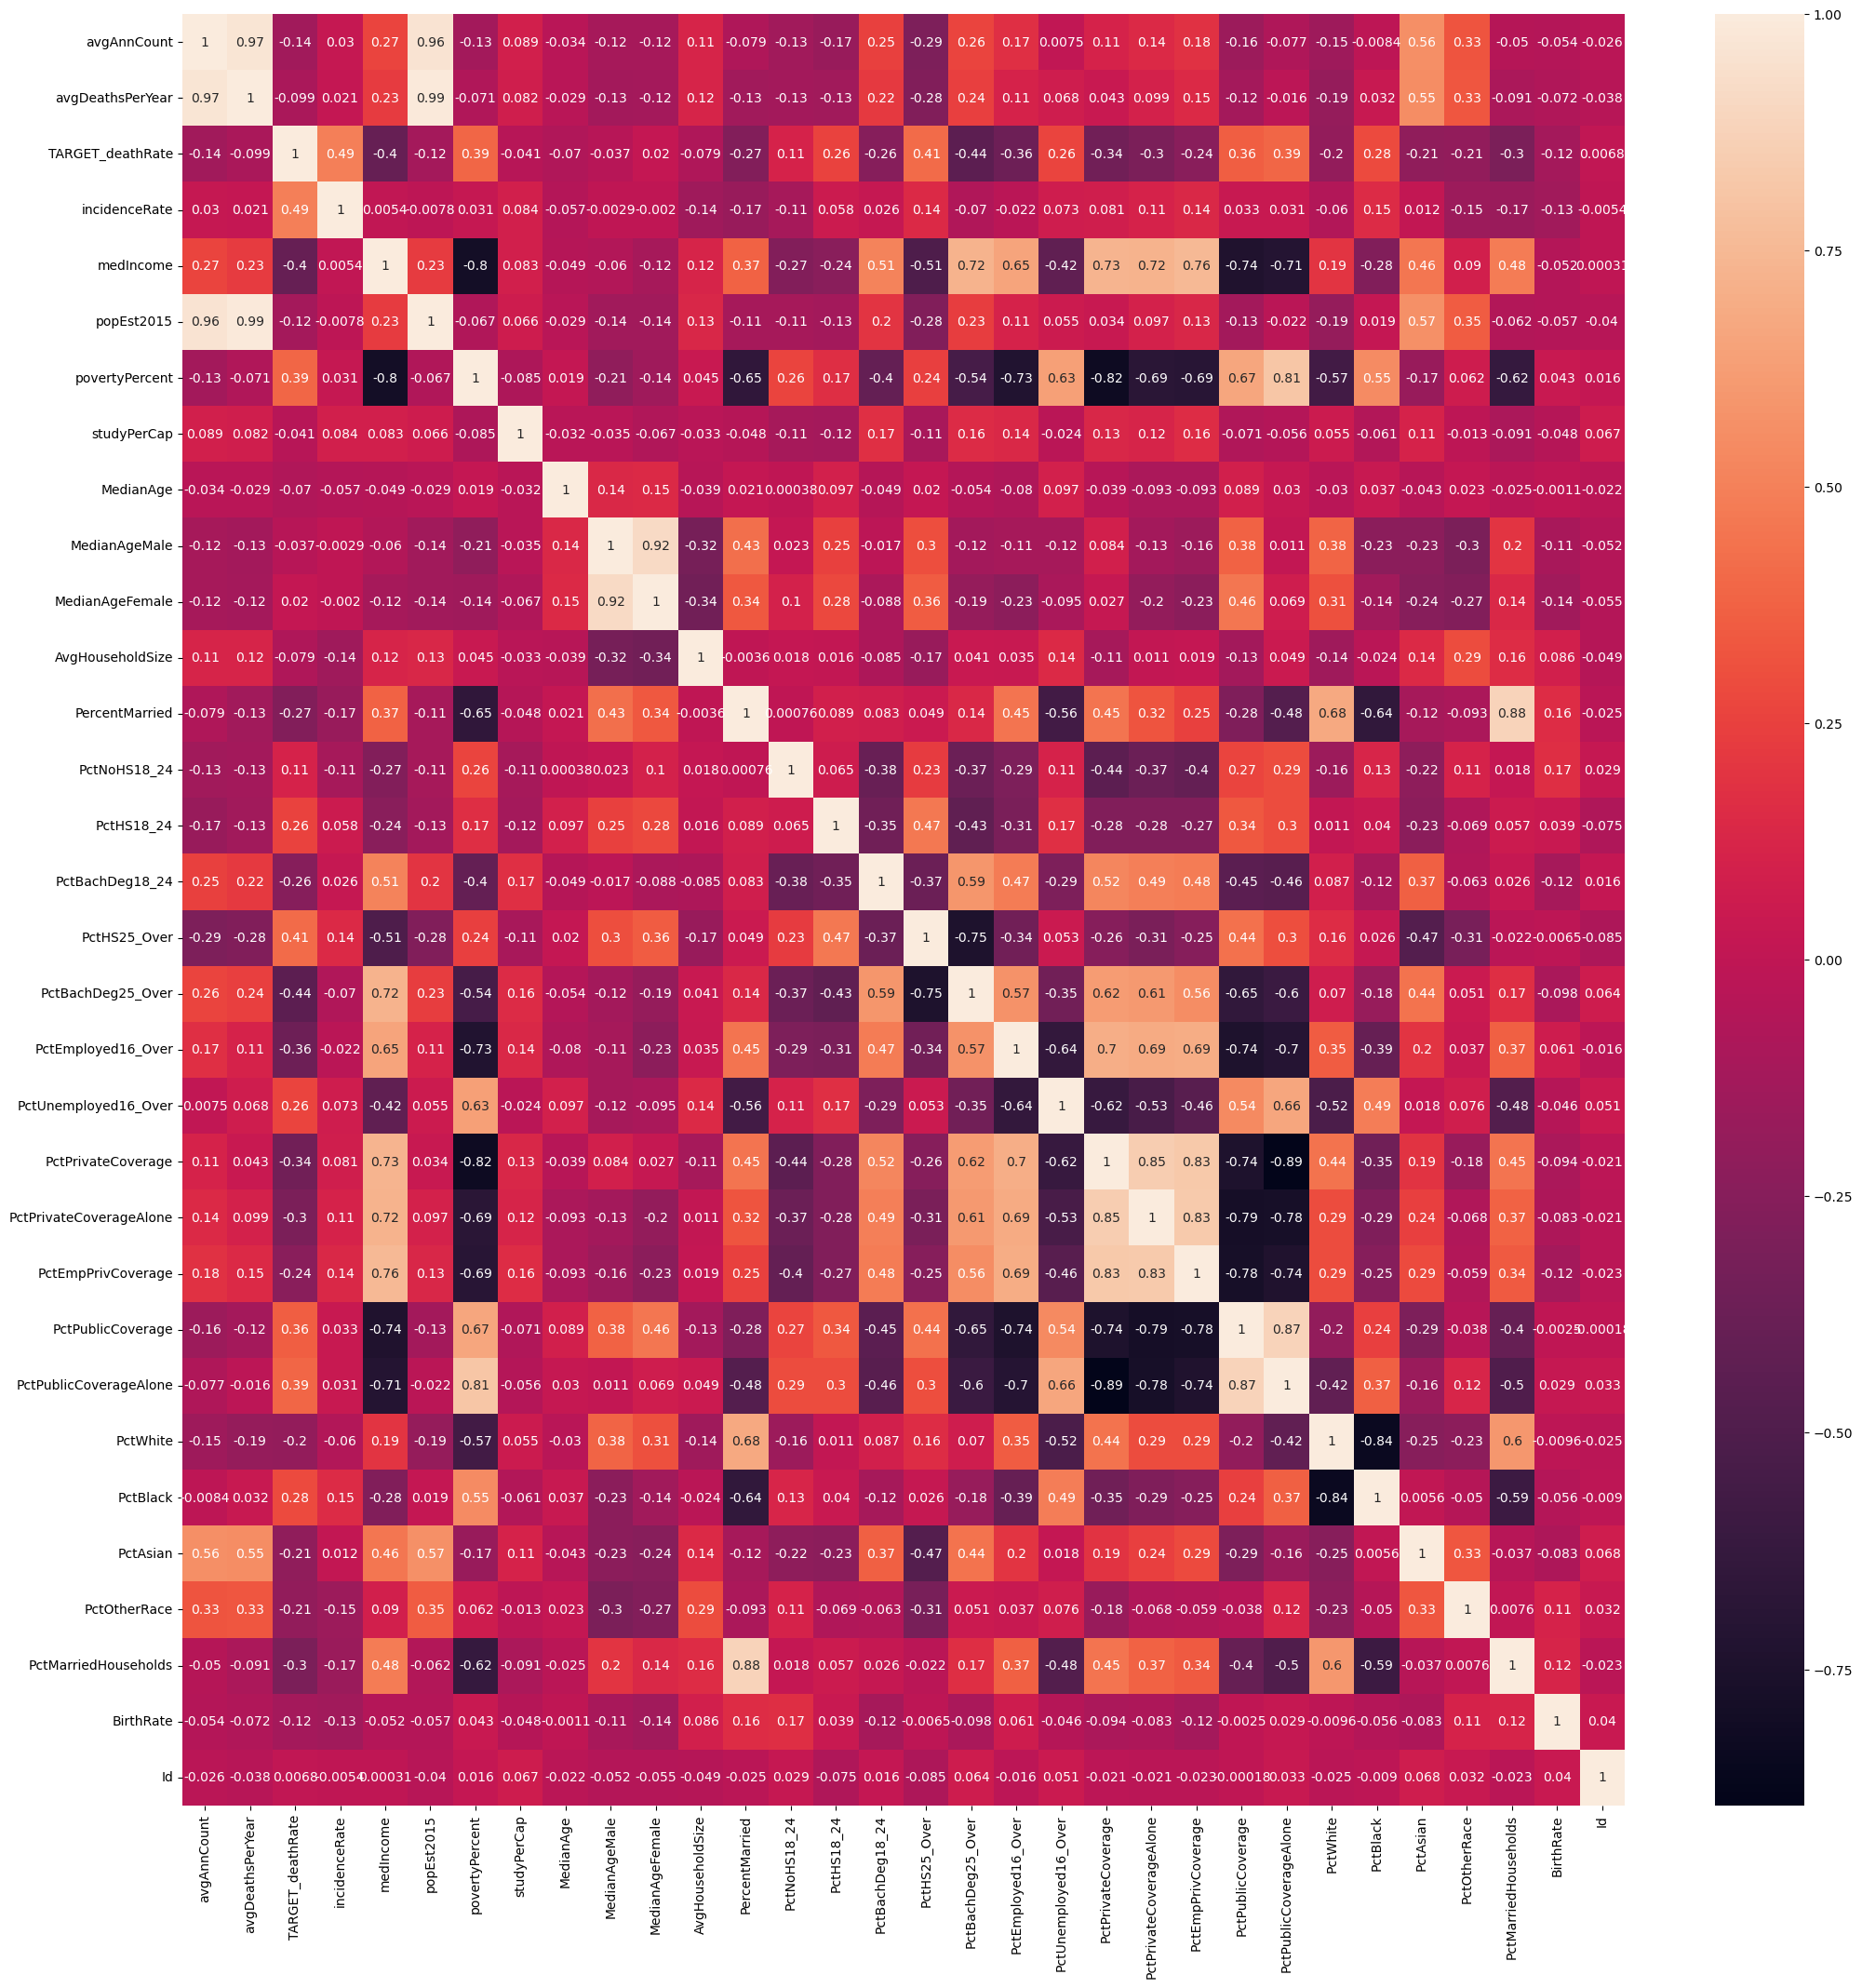

In [14]:
f,ax=plt.subplots(figsize=(25,25));
sns.heatmap(cancer_test_data.corr(),annot=True);

As we inferred from the scatter plots, this heatmap shows that:
incident rate, povertyPercent, PctHS25_over, PctHS18_24, PctUnemployed16_Over, PctPublicCoverage, PctPublicCoverageAlone, are highly positively correlated with the target variable
Added to that, PctBlack is also positively correlated with the target variable
medianIncome, PercentMarried, PctBatchDeg25_Over,PctEmpPrivCoverage, PctPrivateCoverage, PctPrivateCoverageAlone, PctEmplyed16_Over, pctMarriedHousehold are negatively correlated with the target variable
Added to that PctBatchDeg18_24,PctWhite, PctAsian, PctOtherRace are also negatively correlated with the target variable

TypeError: Horizontal orientation requires numeric `x` variable.

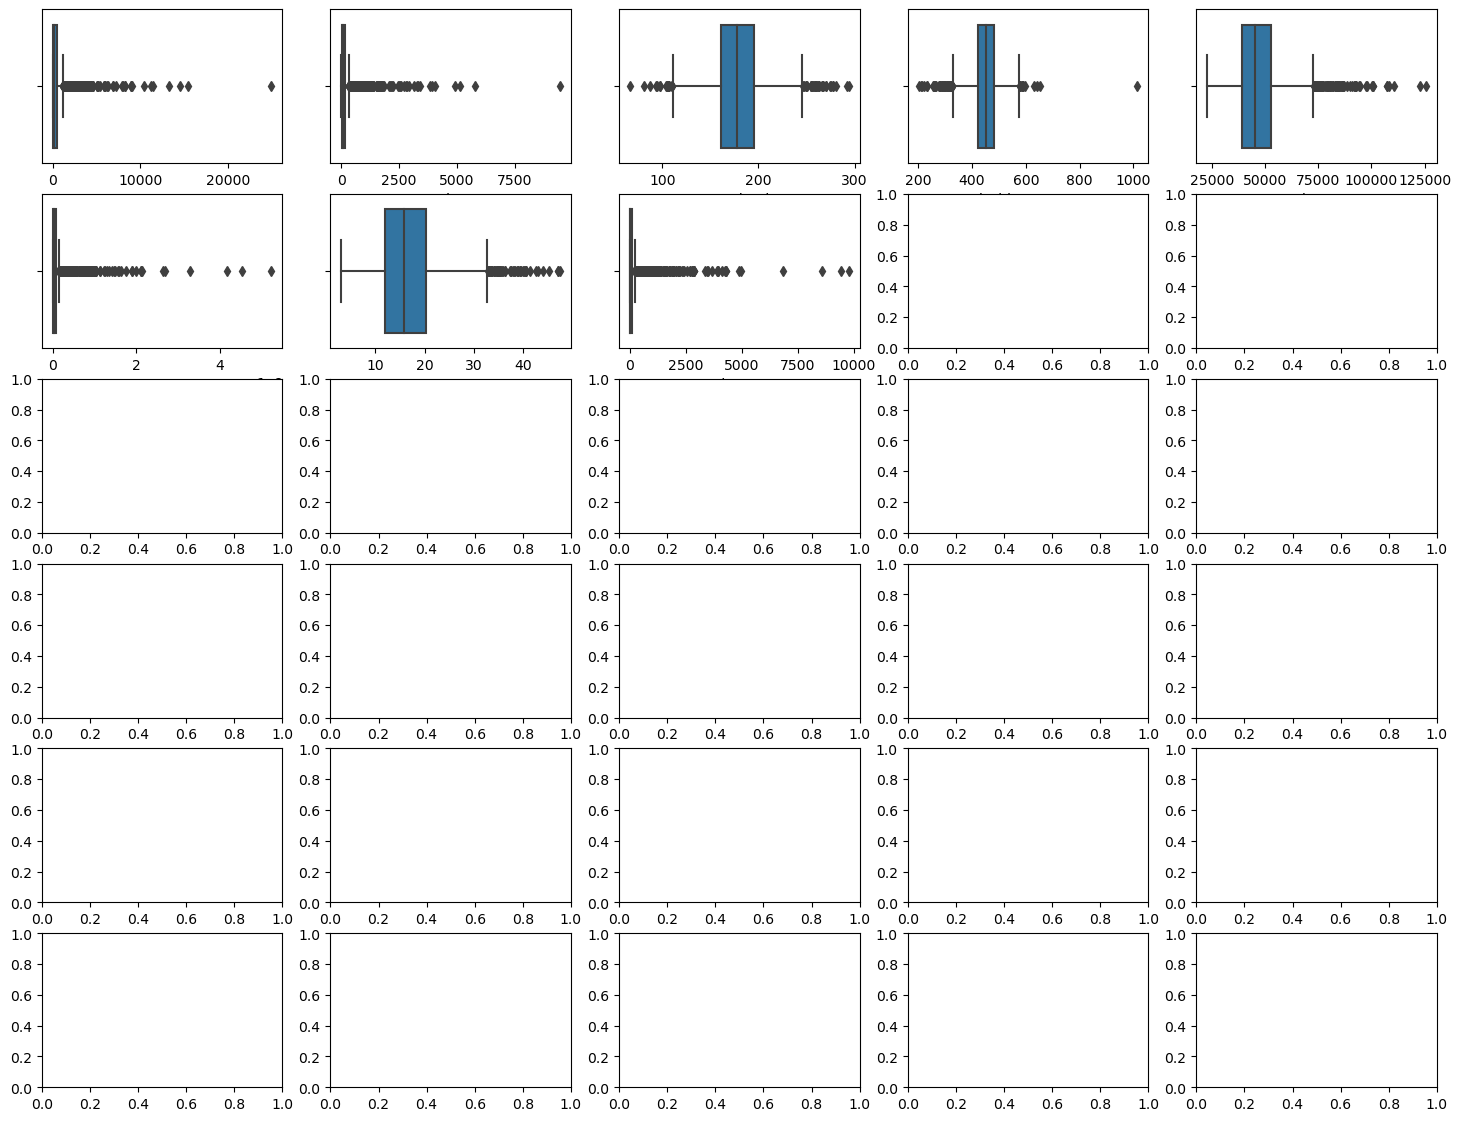

In [15]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_train_data.columns[:-1]):
  plot = sns.boxplot(data=cancer_train_data, x=c, ax=axes[i])
plt.tight_layout()

IndexError: list index out of range

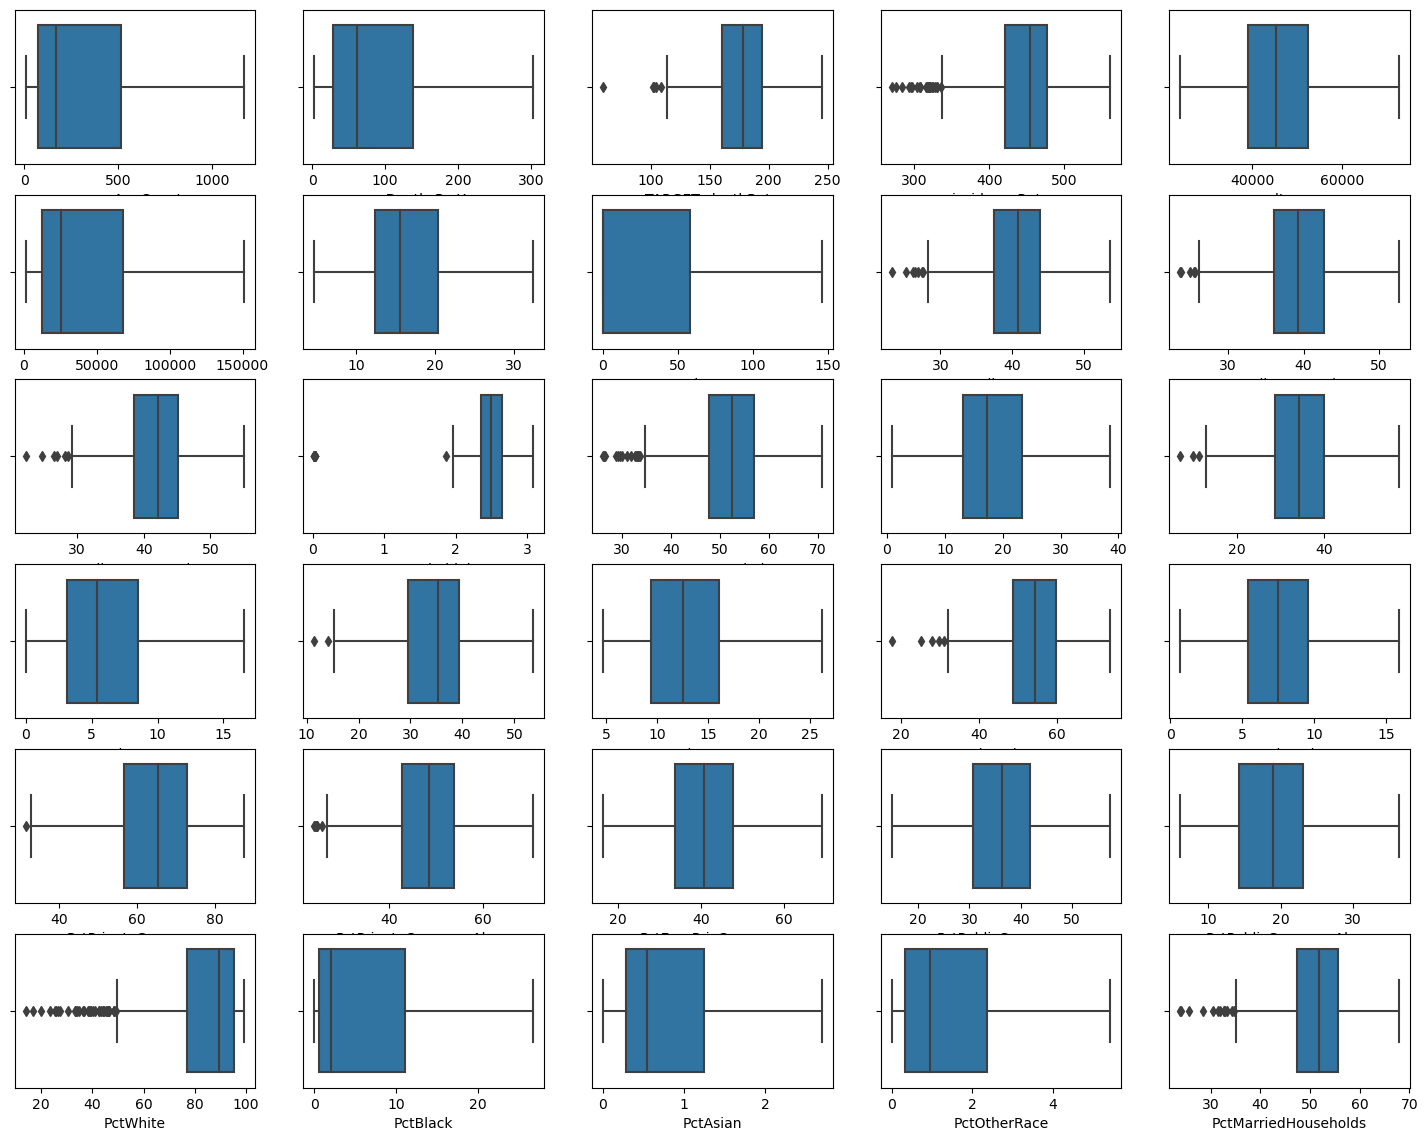

In [62]:
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(cancer_test_data.columns[:-1]):
  plot = sns.boxplot(data=cancer_test_data, x=c, ax=axes[i])
plt.tight_layout()

As we suspected from the scatter plot, there are some outliers in these columnss
avgAnnCount, avgDeathPerYear, IncidentRate, MedianAge,studyPerCap

In [28]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in X_train.select_dtypes(include=['float64','int64']):
    q1 = X_train[i].quantile(0.25)                 
    q3 = X_train[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_train = X_train[(X_train[i] < q1 - whisker_width*iqr) | (X_train[i] > q3 + whisker_width*iqr)]
    X_train.loc[X_train[i]>upper_whisker,i] = upper_whisker

In [29]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in X_test.select_dtypes(include=['float64','int64']):
    q1 = X_test[i].quantile(0.25)                 
    q3 = X_test[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_test = X_test[(X_test[i] < q1 - whisker_width*iqr) | (X_test[i] > q3 + whisker_width*iqr)]
    X_test.loc[X_test[i]>upper_whisker,i] = upper_whisker

In [30]:
# finding all the outliers in all the columns and replacing the same with the upper_whisker value of each column
for i in cancer_test_data.select_dtypes(include=['float64','int64']):
    q1 = cancer_test_data[i].quantile(0.25)                 
    q3 = cancer_test_data[i].quantile(0.75)
    iqr = q3 - q1
    whisker_width = 1.5
    lower_whisker = q1 - whisker_width*iqr
    upper_whisker = q3 + whisker_width*iqr
    outlier_test = cancer_test_data[(cancer_test_data[i] < q1 - whisker_width*iqr) | (cancer_test_data[i] > q3 + whisker_width*iqr)]
    cancer_test_data.loc[cancer_test_data[i]>upper_whisker,i] = upper_whisker

IndexError: list index out of range

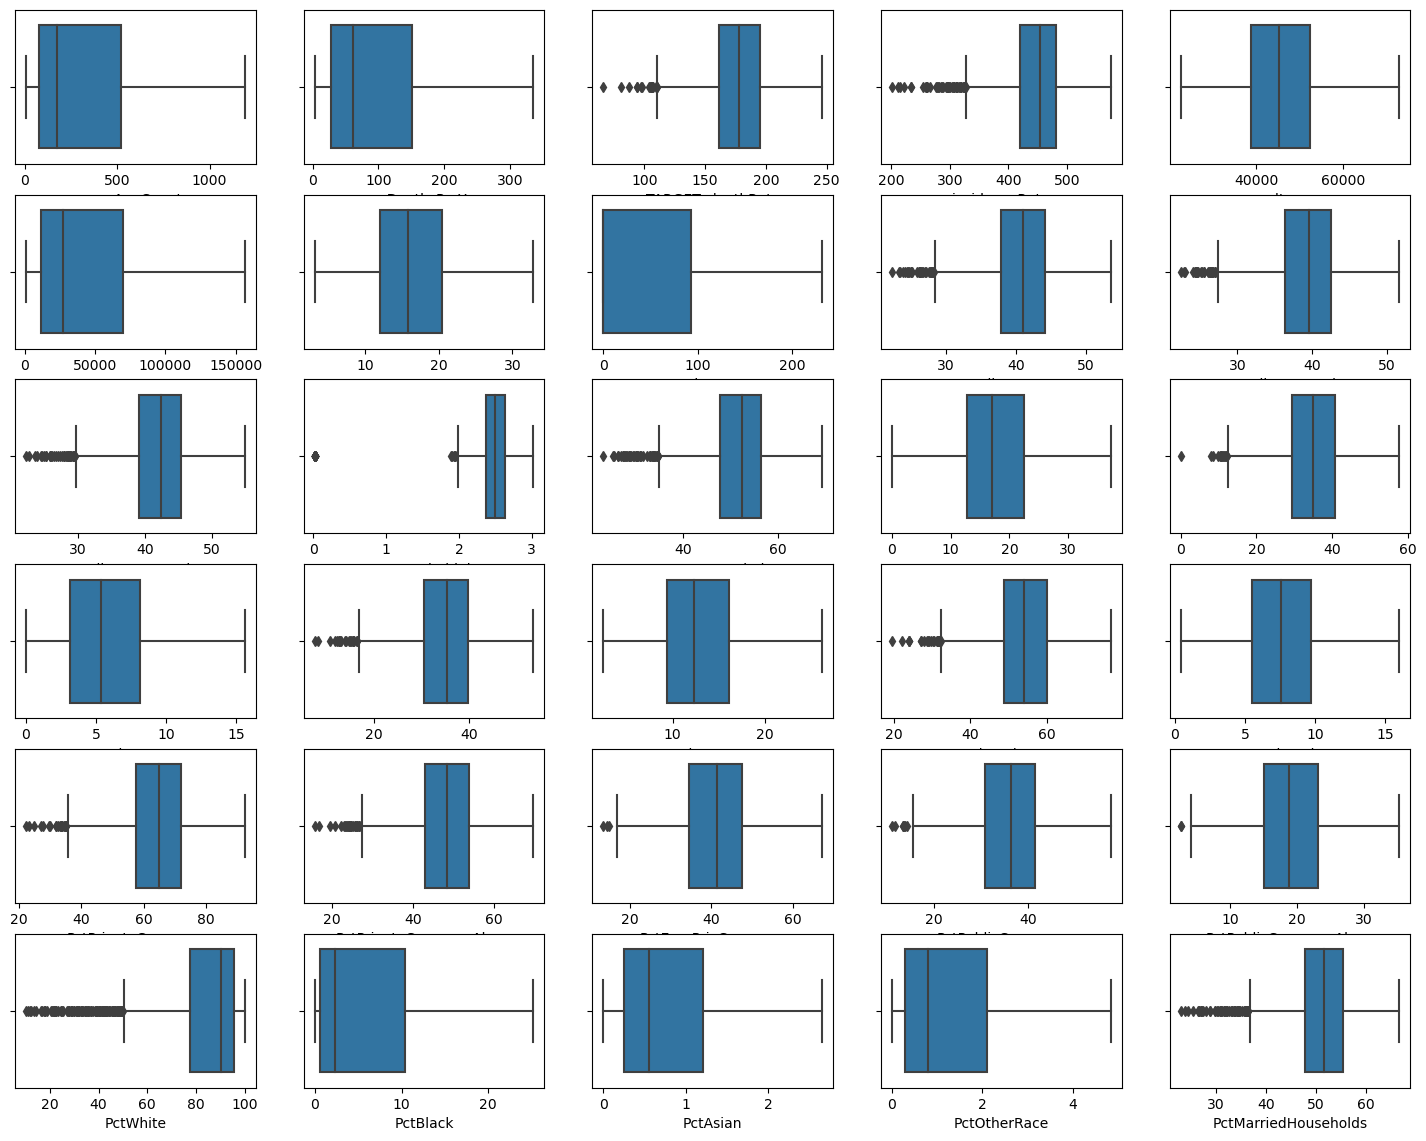

In [31]:
#there are no outliers in the data now
fig, axes = plt.subplots(6, 5, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(X_train.columns):
  plot = sns.boxplot(data=X_train, x=c, ax=axes[i])
plt.tight_layout()

# Feature 1: incidenceRate Vs TARGET_deathRate

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the training and testing datasets
train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')

#dropping this column as it has more null values
train_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)
test_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)

#checking the value counts of two categorical columns in train dataset 
for i in train_data.select_dtypes(include=object):
    print(train_data[i].value_counts(ascending=False))
    print("-------------------------------------------------------------------------------")
    
    
#checking the value counts of two categorical columns in test dataset
for i in test_data.select_dtypes(include=object):
    print(test_data[i].value_counts(ascending=False))
    print("-------------------------------------------------------------------------------")
    
#dropping Geography column as it as more only one count in each unique value
#dropping the binnedInc column as we already have Medianincome of a country column
train_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)
test_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)


# Data preprocessing (e.g., handling missing values)
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


# Select the desired features (replace the list with the selected features)
selected_features = ['incidenceRate']

# Separate features and target variables for training and testing sets
X_train = train_data[selected_features]
y_train = train_data['TARGET_deathRate']
X_test = test_data[selected_features]
y_test = test_data['TARGET_deathRate']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the multivariate linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')


(40362.7, 42724.4]    254
(54545.6, 61494.5]    252
(34218.1, 37413.8]    252
(45201, 48021.6]      249
(37413.8, 40362.7]    242
(61494.5, 125635]     240
(48021.6, 51046.4]    240
(42724.4, 45201]      238
(51046.4, 54545.6]    236
[22640, 34218.1]      235
Name: binnedInc, dtype: int64
-------------------------------------------------------------------------------
Jackson County, Kentucky         1
Cascade County, Montana          1
Morris County, Texas             1
Dallas County, Arkansas          1
Berrien County, Michigan         1
                                ..
Magoffin County, Kentucky        1
Emmons County, North Dakota      1
Monroe County, New York          1
Hall County, Nebraska            1
Yadkin County, North Carolina    1
Name: Geography, Length: 2438, dtype: int64
-------------------------------------------------------------------------------
[22640, 34218.1]      71
(51046.4, 54545.6]    69
(42724.4, 45201]      67
(48021.6, 51046.4]    65
(61494.5, 125635]    

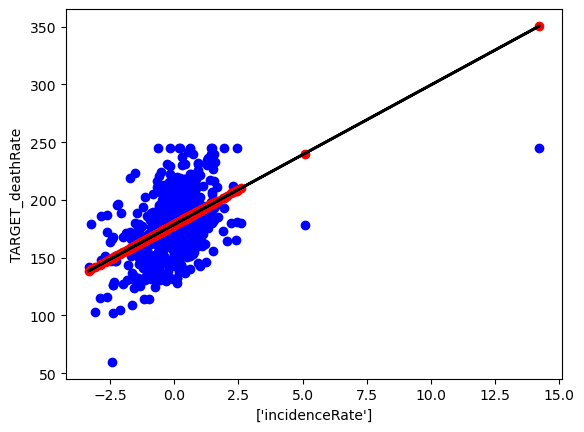

In [66]:
# Plot the regression line
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.xlabel(selected_features)
plt.ylabel('TARGET_deathRate')
plt.show()

# Feature 2: povertyPercent Vs TARGET_deathRate

In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the training and testing datasets
train_data = pd.read_csv('cancer_us_county-training.csv')
test_data = pd.read_csv('cancer_us_county-testing.csv')

#dropping this column as it has more null values
train_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)
test_data.drop(columns=['PctSomeCol18_24'],axis=1,inplace=True)

#checking the value counts of two categorical columns in train dataset 
for i in train_data.select_dtypes(include=object):
    print(train_data[i].value_counts(ascending=False))
    print("-------------------------------------------------------------------------------")
    
    
#checking the value counts of two categorical columns in test dataset
for i in test_data.select_dtypes(include=object):
    print(test_data[i].value_counts(ascending=False))
    print("-------------------------------------------------------------------------------")
    
#dropping Geography column as it as more only one count in each unique value
#dropping the binnedInc column as we already have Medianincome of a country column
train_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)
test_data.drop(columns=['binnedInc', 'Geography'],axis=1,inplace=True)


# Data preprocessing (e.g., handling missing values)
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


# Select the desired features (replace the list with the selected features)
selected_features = ['povertyPercent']

# Separate features and target variables for training and testing sets
X_train = train_data[selected_features]
y_train = train_data['TARGET_deathRate']
X_test = test_data[selected_features]
y_test = test_data['TARGET_deathRate']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the multivariate linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')


(40362.7, 42724.4]    254
(54545.6, 61494.5]    252
(34218.1, 37413.8]    252
(45201, 48021.6]      249
(37413.8, 40362.7]    242
(61494.5, 125635]     240
(48021.6, 51046.4]    240
(42724.4, 45201]      238
(51046.4, 54545.6]    236
[22640, 34218.1]      235
Name: binnedInc, dtype: int64
-------------------------------------------------------------------------------
Jackson County, Kentucky         1
Cascade County, Montana          1
Morris County, Texas             1
Dallas County, Arkansas          1
Berrien County, Michigan         1
                                ..
Magoffin County, Kentucky        1
Emmons County, North Dakota      1
Monroe County, New York          1
Hall County, Nebraska            1
Yadkin County, North Carolina    1
Name: Geography, Length: 2438, dtype: int64
-------------------------------------------------------------------------------
[22640, 34218.1]      71
(51046.4, 54545.6]    69
(42724.4, 45201]      67
(48021.6, 51046.4]    65
(61494.5, 125635]    

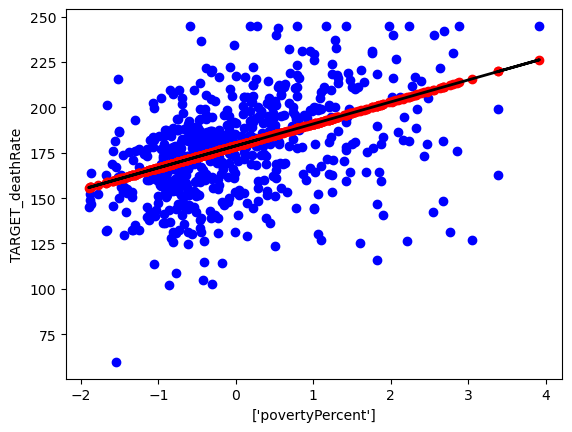

In [64]:
# Plot the regression line
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.xlabel(selected_features)
plt.ylabel('TARGET_deathRate')
plt.show()